
* How to Remove Outliers for Machine Learning; https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/   
* 4 Automatic Outlier Detection Algorithms in Python; https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

## CONTENT
* Standard Deviation Method
* Interquartile Range Method
* Automatic Outlier Detection, a set of authomated methods, often using contactionation, hypeparameter
    * Isolation Forest; based on tree methods, 
    * Minimum Covariance Determinant (MCD); for normally distributed data, 
    * Local Outlier Factor; based on k-nn alg, 
    * One-Class SVM


__Statistics-based outlier detection techniques__ 
* Standard Deviation & IQR methods
* assume that the normal data points would appear in high probability regions of a stochastic model, while outliers would occur in the low probability regions of a stochastic model.




In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

Generate the Data
* We will generate a population 10,000 random numbers drawn from a Gaussian distribution with a mean of 50 and a standard deviation of 5. Numbers drawn from a Gaussian distribution will have outliers. That is, by virtue of the distribution itself, there will be a few values that will be a long way from the mean, rare values that we can identify as outliers.   
* We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.   
* The pseudorandom number generator is seeded to ensure that we get the same sample of numbers each time the code is run.

In [5]:
# Function, ...............................
def create_example_data(seed_nr=1, n=10000, loc=50, k=5, verbose=True):
    '''creates simple 1D, with  np.random.randn
       n - sample size, 
       loc - mean,
       k - int used to multiply random variable.
    '''
    # seed the random number generator
    np.random.seed(1)

    # generate univariate observations
    data = 5 * np.random.randn(n) + 50
    
    # summarize
    if verbose==True:
        print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))
    else:
        pass
    
    return data    
    

## Standard Deviation Method
---
a methods applied to random. var. that have gaussian distribusion. Values above, and below a z.-score threshold are either removed, or replaced wiht mean, or clipped.

__Assumptions__
* the distribution of values in the sample is Gaussian or Gaussian-like, 
* thus, you need to test for normal distribusion (histogram, qq-plot, boxplot + stats)

__properties__
* The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample, eg: ±1SD of the mean, will cover 68% of the data.    
    1 - Standard Deviation from the Mean: 68%  
    2 - Standard Deviations from the Mean: 95%   
    3 - Standard Deviations from the Mean: 99.7%  
    
* So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68% of the data sample. 

__Outliers definition__
* __Commonly mean>3*SD or mean<3*SD__;A value that falls outside of 3 standard deviations.it is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.
* __For smaller samples of data, a value of 2 standard deviations (95%) can be used__, 
* __for large samples,  a value of 4 standard deviations (99.9%) can be used__,

__Limitations__
* in data with large number of null/zero values; eg. is you have many values, or nothing, like with basement are in the home

__How to__
* Given mu and sigma, a simple way to identify outliers is to compute a z-score for every xi, which is defined as the number of standard deviations away xi is from the mean. Data values that have a z-score sigma greater than a threshold, for example, of three, are declared to be outliers.   
* __Standarization;__ Sometimes, the data is standardized first (e.g. to a Z-score with zero mean and unit variance) so that the outlier detection can be performed using standard Z-score cut-off values. This is a convenience and is not required in general.

mean=50.049 stdv=4.994


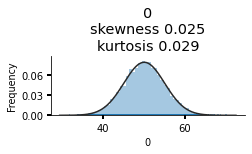

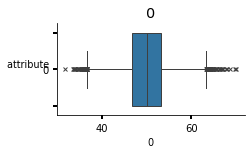

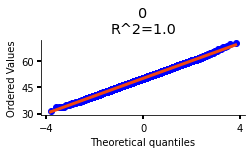

In [6]:
# first check if the dataset has normal distribusion
from src.utils.DataFrameExplorer_distribusion import normality_plots, feature_distribution
warnings.filterwarnings("ignore") # for depracietad function names,

# create example data, 
'''my fuction uses pandas data frame as input'''
data_df = pd.DataFrame(create_example_data())

# plot, 
for plot_type in ["hist", "box", "probplot"]:   
    normality_plots(
        plot_type=plot_type ,
        df=data_df,  
        names= data_df.columns.values.tolist(), # colname to display
        figscale=1.2, #color="forestgreen",
        distplot_dct={
            "norm_hist":True, "rug":True, "kde":False , 
            "fit":stats.norm,"hist_kws":{"linewidth":0.5}}
    )

Identified outliers: 29
Non-outlier observations: 9971


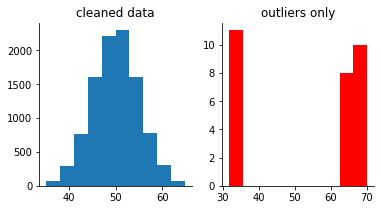

In [7]:
# calculate summary statistics
data_mean, data_std = np.mean(data), np.std(data)

# calculate lower/upper threshold
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
axs[0].hist(outliers_removed)
axs[0].set_title("cleaned data")
axs[1].hist(outliers, color="red")
axs[1].set_title("outliers only")
sns.despine()

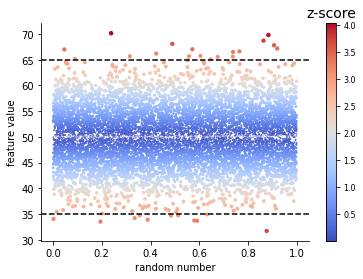

In [10]:
# you can also visualize how far the outliers are from the mean, 

# comput z-scores for each value (we will use abs value to plot the same colors for -/+ values)
z_scores  = np.abs((data - np.mean(data))/np.std(data))

# scatter with z-value as the point colors, 
plt.scatter(
    x=np.random.random(data.shape[0]), # random floats, [0,1]
    y=data,
    s=z_scores*3, # marker size - it will make outliers more visible
    c=z_scores, # color, nubers wil be used in combinaiton with selected cmap
    cmap=plt.cm.coolwarm # if not provided, automatic selection is given 
)
plt.ylabel("feature value")
plt.xlabel("random number")

# colorbar
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('z-score',fontsize=14)

# add lines with ±3xSD/thresholds
plt.axhline(y=lower, color='black', linestyle='--')
plt.axhline(y=upper, color='black', linestyle='--')

sns.despine()

## Interquartile Range Method
---
Interquartile Range (IQR) is statistic used for summarizing a non-Gaussian distribution sample of data. 


The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. 
The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.


__Properties__  
* __Interquartile Range (IQR)__ value a difference between 25th and 75ht percentile. eg. if boxplot, have 25th%=10, and 75%=16, IQR =6. IQR is shown as box on boxplot, 
* outliers, are defines as values that are k*IQR larger or lower then the 25th and 75th percentile values. eg. if we use k=1.5, then the outlier is any value that is eithe <(10-6*1.5) or >(16+6*1.5), that is <1, or >25.  

__Outliers definition__   
* __k=1.5__;  typical value used
* “far outs”; A factor k of 3 or more

__Box-Plots__   
* On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots.

__How to?__  
* __Percentiles__ can be calculated by sorting the observations and selecting values at specific indices.
* If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.
* We can calculate the percentiles of a dataset using the percentile() NumPy function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between the 75th and 25th percentiles

mean=50.049 stdv=4.994


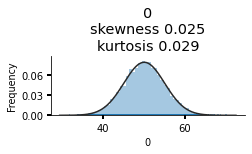

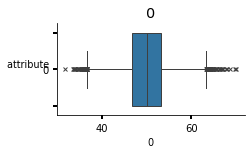

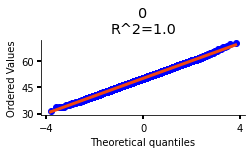

In [11]:
# Create and examine data
# .--------------------------
# first check if the dataset has normal distribusion
from src.utils.DataFrameExplorer_distribusion import normality_plots, feature_distribution
warnings.filterwarnings("ignore") # for depracietad function names,

# create example data, 
'''my fuction uses pandas data frame as input'''
data_df = pd.DataFrame(create_example_data())

# plot, 
for plot_type in ["hist", "box", "probplot"]:   
    normality_plots(
        plot_type=plot_type ,
        df=data_df,  
        names= data_df.columns.values.tolist(), # colname to display
        figscale=1.2, #color="forestgreen",
        distplot_dct={
            "norm_hist":True, "rug":True, "kde":False , 
            "fit":stats.norm,"hist_kws":{"linewidth":0.5}}
    )

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Cutoffs: lower=36.675, upper=63.370, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


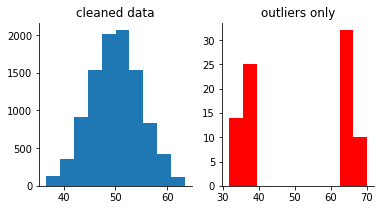

In [12]:
# identify outliers with interquartile range
# -------------------------------------------

# seed k-factor
k = 1.5

# calculate interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * k
lower, upper = q25 - cut_off, q75 + cut_off
print('Cutoffs: lower=%.3f, upper=%.3f, IQR=%.3f' % (q25-cut_off, q75+cut_off, iqr))

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
axs[0].hist(outliers_removed)
axs[0].set_title("cleaned data")
axs[1].hist(outliers, color="red")
axs[1].set_title("outliers only")
sns.despine()

## Automatic Outlier Detection
---
* a set of methods based on one-class classification;  ie the method, where we train our model wiht only one, class, and aything that "signiffficantly" differes form that class is a potential outlier.
* sklearn provides several methods for automatice outlier detection including:
    * IsolationForest algorithm
    * LOF; local outlier factor, based on nearest neighbors alg, 
    * for more see: 4 Automatic Outlier Detection Algorithms in Python; https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

__Properties__
* __A simple approach__; 
    * to identifying outliers as examples that are far from the other examples in the feature space.
    * good approach for low dimensionality problems,
    * less reliable as the number of features is increased == curse of dimensionality.
    
* __Methods implemented in sklearn__
    * Isolation Forest
    * Minimum Covariance Determinant
    * Local Outlier Factor; based on k-nn alg, 
    * One-Class SVM

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor # to detect outliers, 

__data example__
* Boston housing regression problem 
* 13 inputs and one numerical target
* requires learning the relationship between suburb characteristics and house prices.
* The dataset can be downloaded from here:

In [48]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)

print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [56]:
# fucntion, ..................................................
def prepare_data(df, y_col_idx, seed_nr=1, test_size=0.33, verbose=True):
    ''' its helper function that I create to not repeat that step several times, 
        because we will remove outliers, with different methods, 
        df; pd. dataframe, 
        y_col_idx; idx of class labels in np.array 
    '''
    assert isinstance(df, pd.core.frame.DataFrame), "Please use dataframe as input - df" 
    
    # retrieve the array
    data = df.values

    # split into inpiut and output elements
    y = data[:, y_col_idx]
    X = np.delete(data,y_col_idx, 1) # remove column wiht class labels,

    # summarize the shape of the dataset
    if verbose==True:
        print(X.shape, y.shape)
    else:
        pass
    
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=1
    )

    # summarize the shape of the train and test sets
    if verbose==True:
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    else:
        pass
    
    return X_train, X_test, y_train, y_test
        
    
    

__LocalOutlierFactor()__

__novelty__ : bool, default=False
 |      By default, LocalOutlierFactor is only meant to be used for outlier
 |      detection (novelty=False). Set novelty to True if you want to use
 |      LocalOutlierFactor for novelty detection. In this case be aware that
 |      you should only use predict, decision_function and score_samples
 |      on new unseen data and not on the training set.
__contaminaiton - not here__ 

### Baseline Model Performance

__we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE)__

In [64]:
def myModel(X_train, X_test, y_train, y_test, verbose=False):
    
    # fit the model
    model = LinearRegression() # OLS method, 
    model.fit(X_train, y_train)

    # evaluate the model
    yhat = model.predict(X_test)

    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    
    if verbose==True:
        print('MAE: %.3f' % mae)
    else:
        pass
    
    return mae

### finally see how a simple regression model works with raw data, withotu removing outliers


In [67]:
# prepare the data
X_train, X_test, y_train, y_test = prepare_data(
    df=df, y_col_idx=-1, verbose=False)

# evaluate model on all data
_ = myModel(X_train, X_test, y_train, y_test, verbose=True)

MAE: 3.417


### __LOF; local outlier factor__
* using nearest neighbors for outlier detection. 
* Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. 
* Those examples with the largest score are more likely to be outliers.
* sklearn:
    * LocalOutlierFactor()
    * removes label each row as either a potential outlier (-1) or normal (1)

In [179]:
# Function, ............................................
def outlier_report(outlier_labels, name="."):
    ''' small heper function to 
        check how many samples were labelles as outliers
    '''
    # first count ouliers and inliners with 
    #.   sample labels returnsed with sklearn oulier detection methods
    outlier_nr = np.sum(outlier_labels==False)
    inliners_nr = outlier_labels.size-outlier_nr
    
    print(f"{name} ......................")
    print(f"outliers nr: {outlier_nr}")
    print(f"inliners nr: {inliners_nr}")
    print(f"outlier %: {np.round(outlier_nr/inliners_nr, 3)}") 
    print("\n")

In [180]:
# Function, ............................................
def remove_outliers_and_fit_model(df, y_col_idx, est, verbose=False):
    ''' 
        df; pd. dataframe, 
        y_col_idx; idx of class labels in np.array 
    '''
    assert isinstance(df, pd.core.frame.DataFrame), "Please use dataframe as input - df" 
   
    # prepare the data
    X_train, X_test, y_train, y_test = prepare_data(
        df=df, y_col_idx=y_col_idx, verbose=False)

    # identify outliers in the training dataset
    est.fit(X_train) #  potential outlier (-1) or normal (1)
    train_outlier_labels = est.predict(X_train)!= -1 #  potential outlier (-1) or normal (1)
    test_outlier_labels = est.predict(X_test)!= -1 #  potential outlier (-1) or normal (1)

    # print how many outliers were detected
    if verbose==True:
        outlier_report(train_outlier_labels, name="train")
        outlier_report(test_outlier_labels, name="test")
    else:
        pass

    # select all rows that are not outliers
    X_train, y_train = X_train[train_outlier_labels, :], y_train[train_outlier_labels]

    # evaluate model on all data
    mae = myModel(X_train, X_test, y_train, y_test, verbose=verbose)
    
    return mae

In [182]:
_ = remove_outliers_and_fit_model(
    df=df, 
    y_col_idx=-1, 
    est=LocalOutlierFactor(novelty=True), 
    verbose=True)

train ......................
outliers nr: 31
inliners nr: 308
outlier %: 0.101


test ......................
outliers nr: 20
inliners nr: 147
outlier %: 0.136


MAE: 3.364


### Isolation Forest
---
* iForest for short
* a tree-based anomaly detection algorithm.
* It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.
* it takes advantage of two anomalies’ quantitative properties:   
    (i) they are the minority consisting of fewer instances  
    (ii) they have attribute-values that are very different from those of normal instances.  
* scikit-learn
    * __IsolationForest__ class.
    * “contamination” argument - importnast hyperarameter that is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

In [183]:
from sklearn.ensemble import IsolationForest

_ = remove_outliers_and_fit_model(
    df=df, 
    y_col_idx=-1, 
    est=IsolationForest(contamination=0.1), 
    verbose=True)

train ......................
outliers nr: 34
inliners nr: 305
outlier %: 0.111


test ......................
outliers nr: 15
inliners nr: 152
outlier %: 0.099


MAE: 3.290


### Minimum Covariance Determinant MCD
---
* assumes that input variables have a Gaussian distribution, 
* if the above is the case, then simple statistical methods can be used to detect outliers.
* (MCD) method is a highly robust estimator of multivariate location and scatter, for which a fast algorithm is available.
* it is automatized, version of the outlier detection with 

__Example__ 
* if the dataset has two input variables and both are Gaussian, then the feature space forms a multi-dimensional Gaussian and knowledge of this distribution can be used to identify values far from the distribution.
* This approach can be generalized by defining a hypersphere (ellipsoid) that covers the normal data, and data that falls outside this shape is considered an outlier. 

__Sklearn__
* EllipticEnvelope()
    * __“contamination”__ argument that defines the expected ratio of outliers to be observed in practice. eg 0.1, or 0.99, 
    

In [185]:
from sklearn.covariance import EllipticEnvelope

_ = remove_outliers_and_fit_model(
    df=df, 
    y_col_idx=-1, 
    est=EllipticEnvelope(contamination=0.1), 
    verbose=True)

train ......................
outliers nr: 34
inliners nr: 305
outlier %: 0.111


test ......................
outliers nr: 14
inliners nr: 153
outlier %: 0.092


MAE: 3.539


### One-Class SVM
---

The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification.

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.

an algorithm that computes a binary function that is supposed to capture regions in input space where the probability density lives (its support), that is, a function such that most of the data will live in the region where the function is nonzero.

Although SVM is a classification algorithm and One-Class SVM is also a classification algorithm, it can be used to discover outliers in input data for both regression and classification datasets.

__scikit-learn__   
    * OneClassSVM class.   
    * __“nu”__ argument that specifies the approximate ratio of outliers in the dataset, which defaults to 0.1. 
    
    

In [186]:
# identify outliers in the training dataset
from sklearn.svm import OneClassSVM

_ = remove_outliers_and_fit_model(
    df=df, 
    y_col_idx=-1, 
    est=OneClassSVM(nu=0.1), 
    verbose=True)

train ......................
outliers nr: 34
inliners nr: 305
outlier %: 0.111


test ......................
outliers nr: 15
inliners nr: 152
outlier %: 0.099


MAE: 3.448
